In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

data=pd.read_csv("sales_data_with_discounts.csv")
data.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [ ]:
num_col=[col for col in data if data[col].dtype in ["int64","float64"]]
num_col

['Volume',
 'Avg Price',
 'Total Sales Value',
 'Discount Rate (%)',
 'Discount Amount',
 'Net Sales Value']

In [ ]:
agg=[]
for col in num_col:
    results=data[col].agg(["min","max","mean","median","var","std"])
    agg.append(results)

pd.DataFrame(agg)

,min,max,mean,median,var,std
Volume,1.000000,31.000000,5.066667,4.000000,1.790646e+01,4.231602
Avg Price,290.000000,60100.000000,10453.433333,1450.000000,3.268830e+08,18079.904840
Total Sales Value,400.000000,196400.000000,33812.835556,5700.000000,2.553794e+09,50535.074173
Discount Rate (%),5.007822,19.992407,15.155242,16.577766,1.781348e+01,4.220602
Discount Amount,69.177942,25738.022194,3346.499424,988.933733,2.033922e+07,4509.902963
Net Sales Value,326.974801,179507.479049,30466.336131,4677.788059,2.149125e+09,46358.656624


In [ ]:
cat_col=[col for col in data if data[col].dtype in ["object"]]
cat_col

['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']

In [ ]:
def plots(col):
    fig=plt.figure(figsize=(6,4))
    plt.subplots_adjust(hspace=0.6)

    plt.subplot(1,2,1)
    sns.distplot(data[col])
    plt.title(f'{col} Density Distribution')

    plt.subplot(1,2,2)
    sns.boxplot(x=col,data=data)

    plt.show()

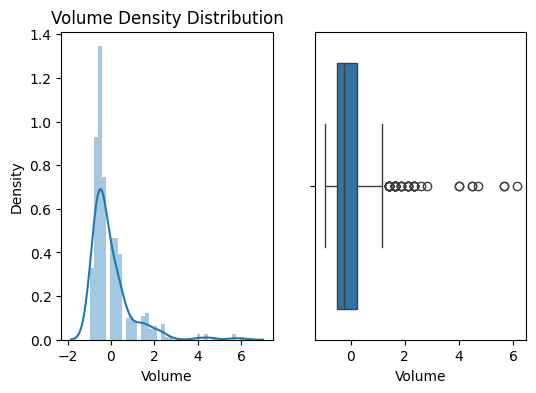

None


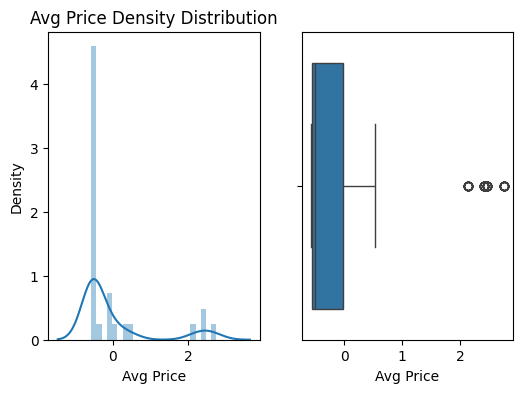

None


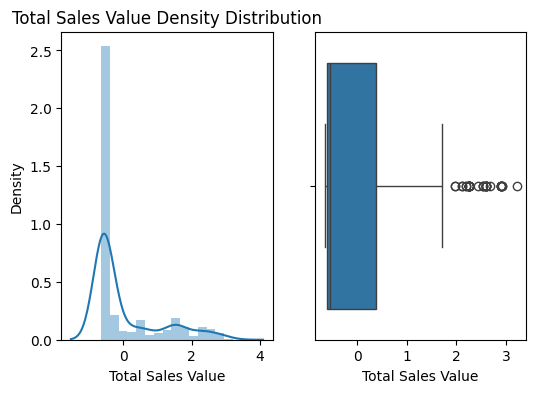

None


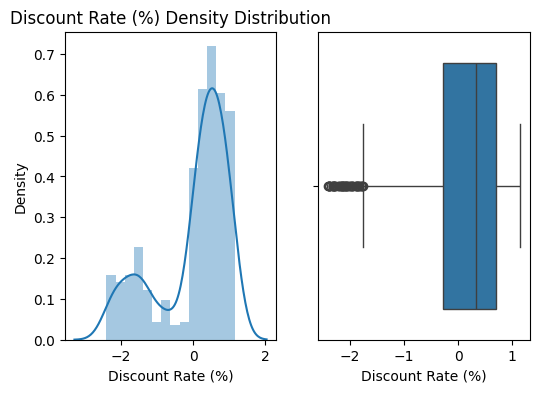

None


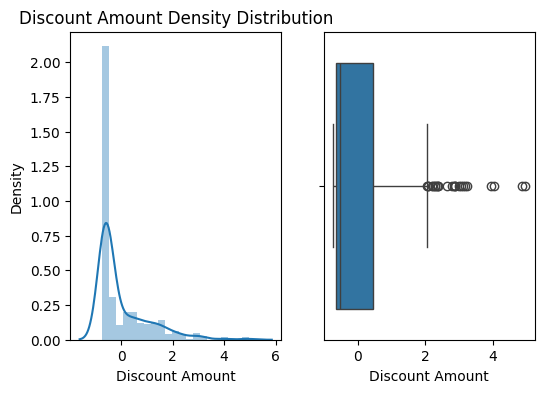

None


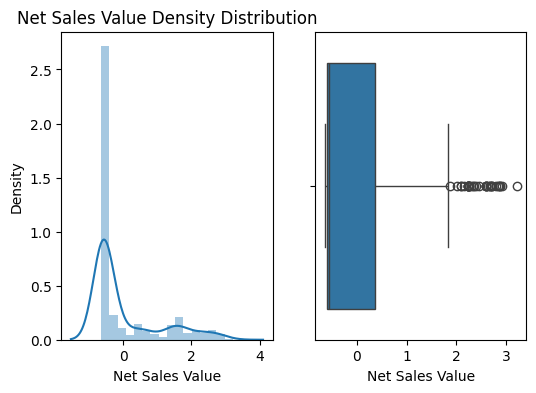

None


In [ ]:
for col in num_col:
    print(plots(col))

In [ ]:
def cat_plot(col):
    fig=plt.figure(figsize=(6,4))
    plt.subplots_adjust(hspace=0.6)

    sns.countplot(y=col,data=data,palette="Set2")
    plt.show()


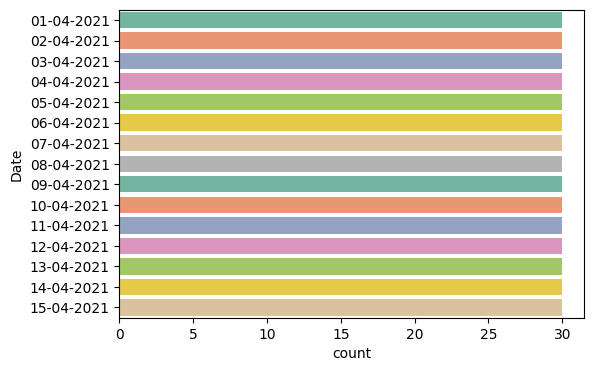

None


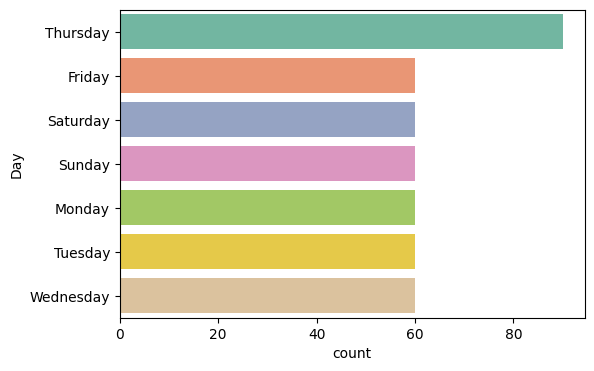

None


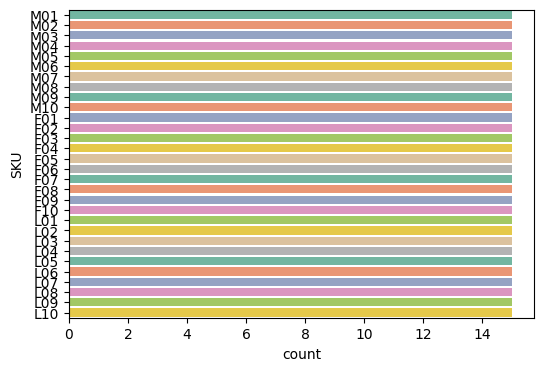

None


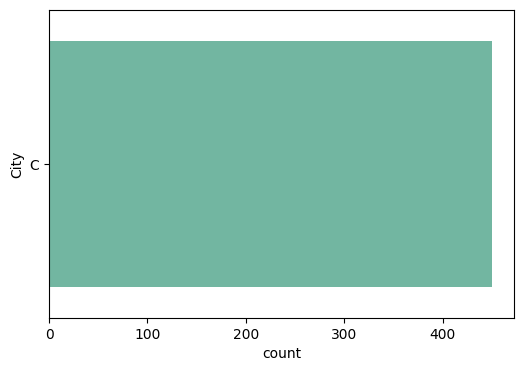

None


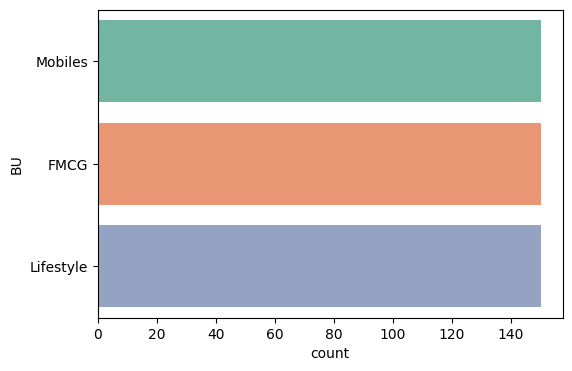

None


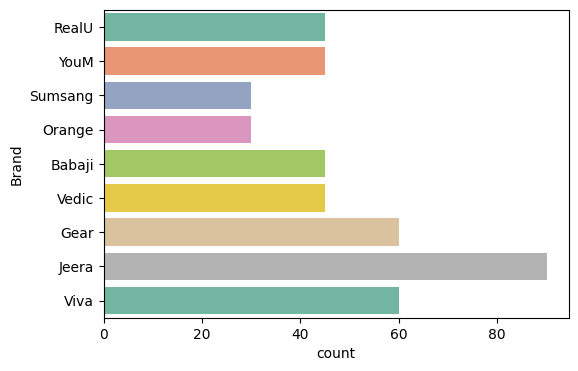

None


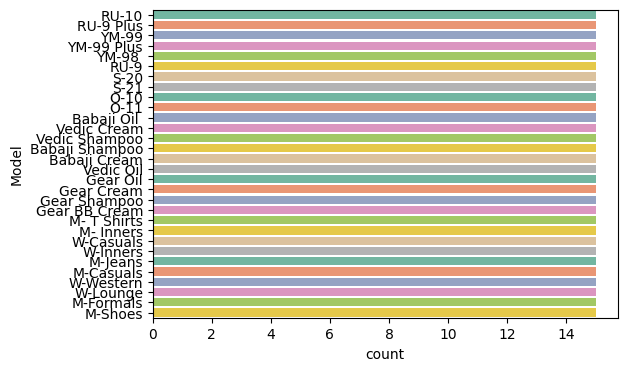

None


In [ ]:
for col in cat_col:
    print(cat_plot(col))

Volume - Original Mean: 5.07
Volume - Original Std Dev: 4.23
Volume - Standardized Mean: 0.00
Volume - Standardized Std Dev: 1.00


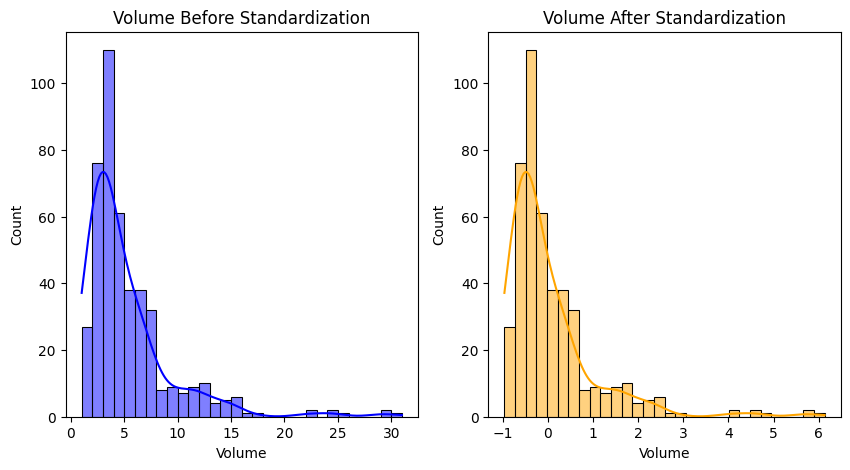

Avg Price - Original Mean: 10453.43
Avg Price - Original Std Dev: 18079.90
Avg Price - Standardized Mean: 0.00
Avg Price - Standardized Std Dev: 1.00


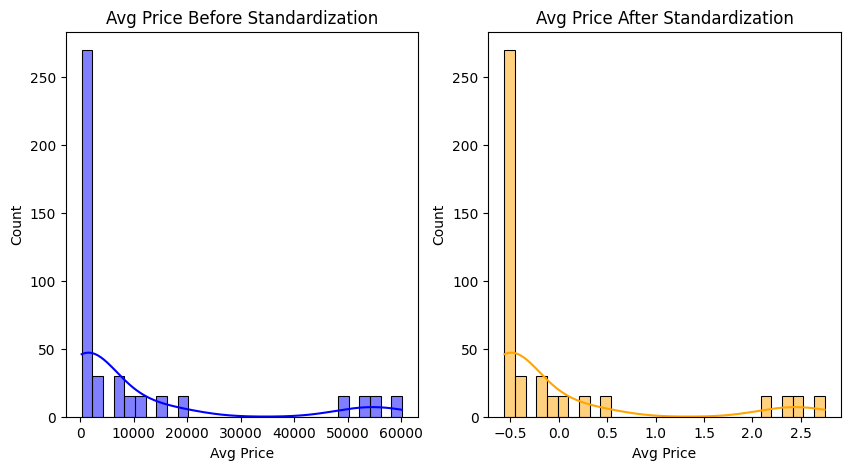

Total Sales Value - Original Mean: 33812.84
Total Sales Value - Original Std Dev: 50535.07
Total Sales Value - Standardized Mean: 0.00
Total Sales Value - Standardized Std Dev: 1.00


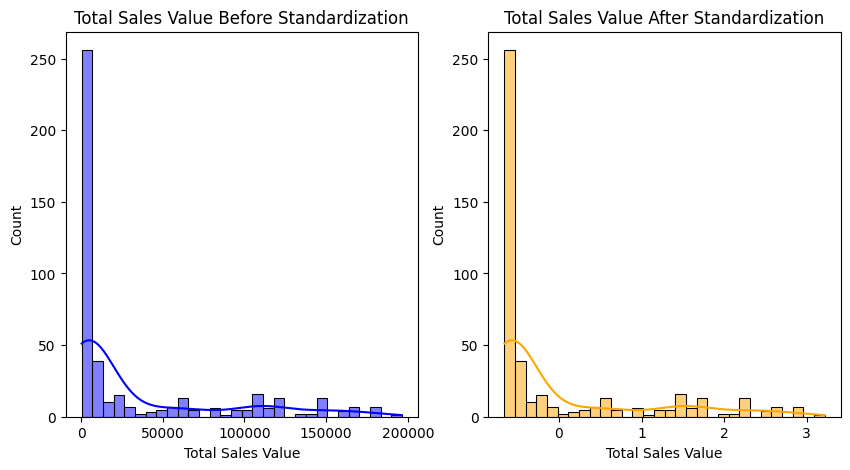

Discount Rate (%) - Original Mean: 15.16
Discount Rate (%) - Original Std Dev: 4.22
Discount Rate (%) - Standardized Mean: -0.00
Discount Rate (%) - Standardized Std Dev: 1.00


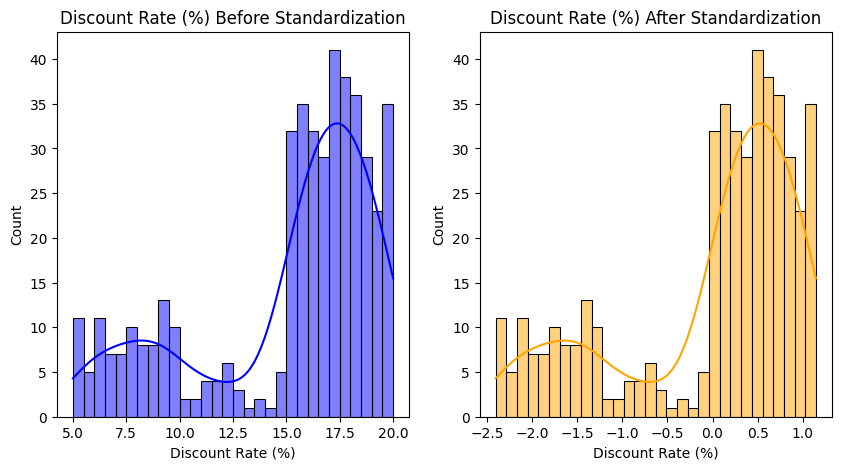

Discount Amount - Original Mean: 3346.50
Discount Amount - Original Std Dev: 4509.90
Discount Amount - Standardized Mean: -0.00
Discount Amount - Standardized Std Dev: 1.00


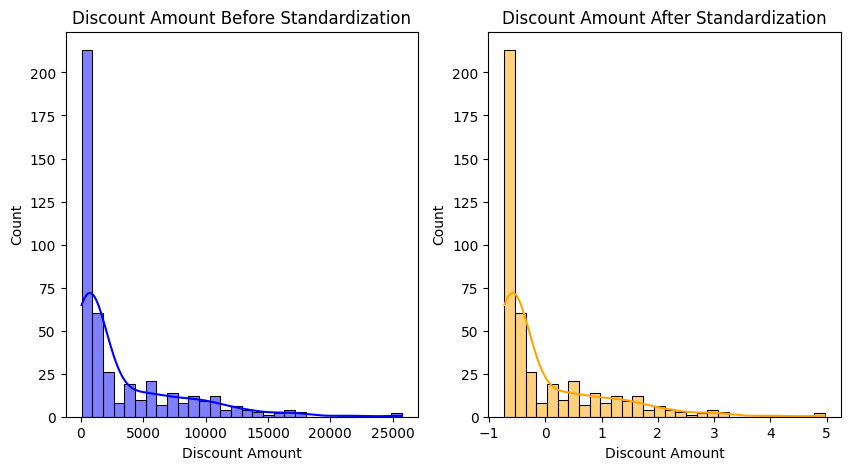

Net Sales Value - Original Mean: 30466.34
Net Sales Value - Original Std Dev: 46358.66
Net Sales Value - Standardized Mean: 0.00
Net Sales Value - Standardized Std Dev: 1.00


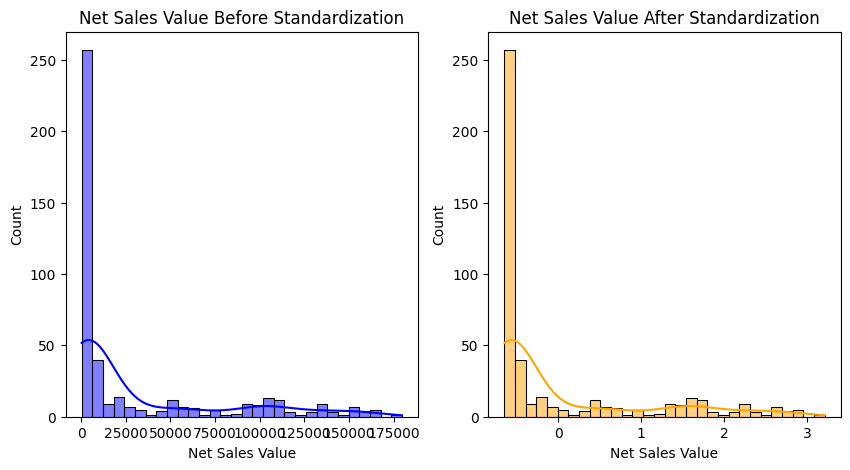

In [ ]:
for col in num_col:
    fig = plt.figure(figsize=(10, 5))
    plt.subplots_adjust(hspace=0.6)

    # Original distribution
    plt.subplot(1, 2, 1)
    sns.histplot(x=data[col], kde=True, bins=30, color='blue')
    plt.title(f"{col} Before Standardization")
    print(f"{col} - Original Mean: {data[col].mean():.2f}")
    print(f"{col} - Original Std Dev: {data[col].std():.2f}")

    # Z-score standardization (overwrite `data[col]`)
    data[col] = (data[col] - data[col].mean()) / data[col].std()

    # Standardized distribution
    plt.subplot(1, 2, 2)
    sns.histplot(x=data[col], kde=True, bins=30, color='orange')
    plt.title(f"{col} After Standardization")
    print(f"{col} - Standardized Mean: {data[col].mean():.2f}")
    print(f"{col} - Standardized Std Dev: {data[col].std():.2f}")

    plt.show()


In [ ]:
data[cat_col].head()

,Date,Day,SKU,City,BU,Brand,Model
0,01-04-2021,Thursday,M01,C,Mobiles,RealU,RU-10
1,01-04-2021,Thursday,M02,C,Mobiles,RealU,RU-9 Plus
2,01-04-2021,Thursday,M03,C,Mobiles,YouM,YM-99
3,01-04-2021,Thursday,M04,C,Mobiles,YouM,YM-99 Plus
4,01-04-2021,Thursday,M05,C,Mobiles,YouM,YM-98


In [ ]:
data[cat_col].nunique()

,0
Date,15
Day,7
SKU,30
City,1
BU,3
Brand,9
Model,30


In [ ]:
df=data.copy()
df1=pd.get_dummies(data[["Day","City","BU","Brand"]],drop_first=True).astype("int")
df1.head()

,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,BU_Lifestyle,BU_Mobiles,Brand_Gear,Brand_Jeera,Brand_Orange,Brand_RealU,Brand_Sumsang,Brand_Vedic,Brand_Viva,Brand_YouM
0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1


In [ ]:
df.drop(df[["Day","City","BU","Brand"]], inplace=True,axis=1)
df.head()


,Date,SKU,Volume,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,M01,2.347417,RU-10,0.091072,2.922469,-0.829365,3.948422,2.801638
1,01-04-2021,M02,1.165831,RU-9 Plus,-0.019548,1.329516,-0.851714,1.846958,1.269613
2,01-04-2021,M03,0.456880,YM-99,0.312312,1.561038,-1.350129,1.621190,1.543957
3,01-04-2021,M04,0.220563,YM-99 Plus,0.533552,1.717365,-1.947555,1.112568,1.763847
4,01-04-2021,M05,-0.488389,YM-98,-0.130168,-0.188242,0.672990,0.227598,-0.227342


In [ ]:
df3=pd.concat((df,df1))
df3.head()

,Date,SKU,Volume,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Day_Monday,...,BU_Lifestyle,BU_Mobiles,Brand_Gear,Brand_Jeera,Brand_Orange,Brand_RealU,Brand_Sumsang,Brand_Vedic,Brand_Viva,Brand_YouM
0,01-04-2021,M01,2.347417,RU-10,0.091072,2.922469,-0.829365,3.948422,2.801638,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01-04-2021,M02,1.165831,RU-9 Plus,-0.019548,1.329516,-0.851714,1.846958,1.269613,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01-04-2021,M03,0.456880,YM-99,0.312312,1.561038,-1.350129,1.621190,1.543957,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01-04-2021,M04,0.220563,YM-99 Plus,0.533552,1.717365,-1.947555,1.112568,1.763847,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-04-2021,M05,-0.488389,YM-98,-0.130168,-0.188242,0.672990,0.227598,-0.227342,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
